In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_hdf('Data.h5')

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

decompose_hourly = []
decompose_daily = []
for i in range(data.shape[1]):
    series = data.iloc[:,i]
    decompose_hourly.append(seasonal_decompose(series, model='additive', freq=60).resid)
    decompose_daily.append(seasonal_decompose(series, model='additive', freq=60*24).resid)


In [24]:
df_daily = pd.DataFrame(decompose_daily).transpose()
df_hourly = pd.DataFrame(decompose_hourly).transpose()

In [25]:
window_size = 1000

rolling_means_daily = df_daily.rolling(window_size).mean()
rolling_stds_daily = df_daily.rolling(window_size).std()
anomalies_daily = rolling_stds_daily > rolling_stds_daily.mean() + rolling_stds_daily.std()

rolling_means_hourly = df_hourly.rolling(window_size).mean()
rolling_stds_hourly = df_hourly.rolling(window_size).std()
anomalies_hourly = rolling_stds_hourly > rolling_stds_hourly.mean() + rolling_stds_hourly.std()

47
610FIC009A PID_PLA.OP


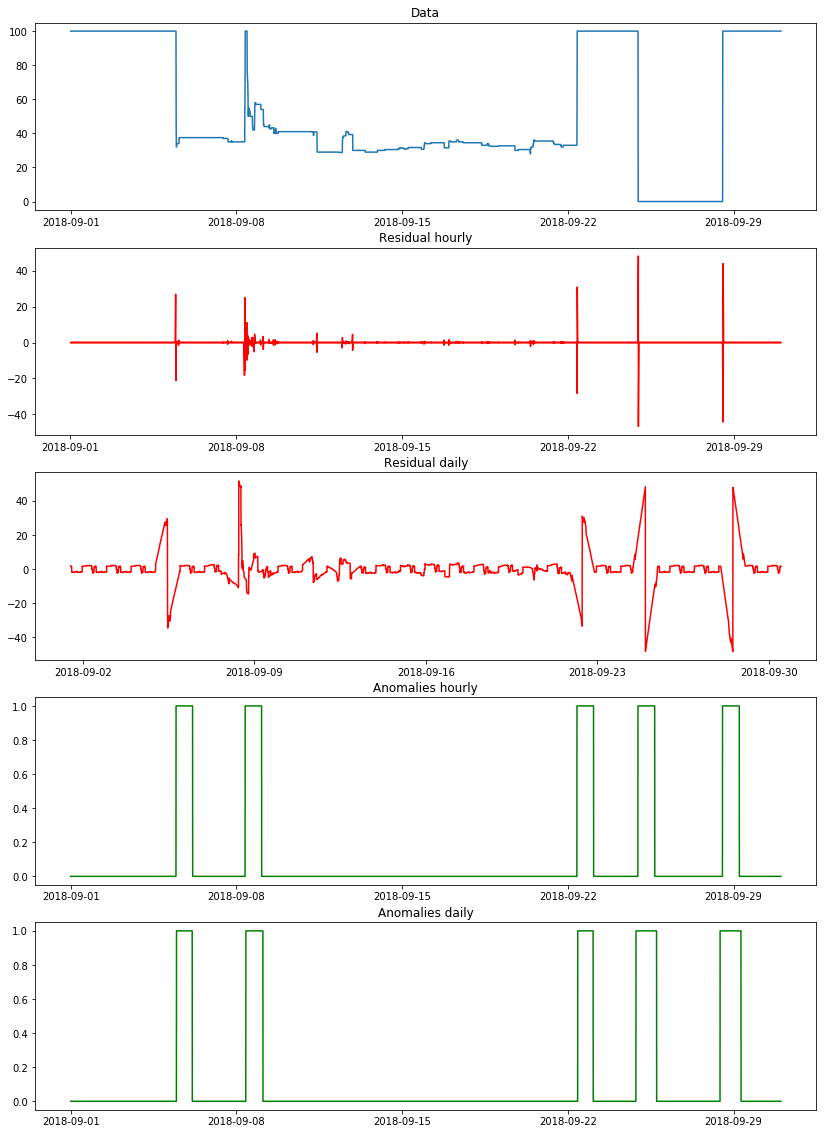

In [81]:
# i=75
i=np.random.randint(data.shape[1])
print(i)
print(data.columns[i])

plt.figure(figsize=(14,20))
plt.subplot(5,1,1)
plt.title('Data')
plt.plot(data.index, data.iloc[:,i])

plt.subplot(5,1,2)
plt.title('Residual hourly')
plt.plot(data.index, decompose_hourly[i], color='red')

plt.subplot(5,1,3)
plt.title('Residual daily')
plt.plot(data.index, decompose_daily[i], color='red')

plt.subplot(5,1,4)
plt.title('Anomalies hourly')
plt.plot(data.index, anomalies_hourly.iloc[:,i], color='green')

plt.subplot(5,1,5)
plt.title('Anomalies daily')
plt.plot(data.index, anomalies_daily.iloc[:,i], color='green')